In [90]:
import scipy.io
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_html 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import interp1d
%matplotlib inline

In [91]:
mat = scipy.io.loadmat('OPC20200406_1.mat')
mat2 = scipy.io.loadmat('OPC20200406_3.mat')
mat3 = scipy.io.loadmat('06042020ACS.mat')
mdata = mat['tmp']
mdata2 = mat2['tmp']
mdata3 = mat3['ACS']
mtype = mdata.dtype
mtype2 = mdata2.dtype
mtype3 = mdata3.dtype

In [92]:
#For convenience make a dictionary of the data using the names from dtypes
#Since the structure has only one element, but is 2-D, index it at [0, 0]
ndata = {n: mdata[n][0,0] for n in mtype.names}#for 1.mat
ndata

{'ver': array([[2]], dtype=uint8),
 'rmin': array([[ 0.175,  0.23 ,  0.33 ,  0.5  ,  0.65 ,  0.85 ,  1.15 ,  1.5  ,
          2.   ,  2.6  ,  3.25 ,  4.   ,  5.   ,  6.   ,  7.   ,  8.   ,
          9.   , 10.   , 11.   , 12.5  , 14.   , 15.5  , 17.   , 18.5  ]]),
 'rmax': array([[ 0.23,  0.33,  0.5 ,  0.65,  0.85,  1.15,  1.5 ,  2.  ,  2.6 ,
          3.25,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  ,
         12.5 , 14.  , 15.5 , 17.  , 18.5 , 20.  ]]),
 'r': array([[ 0.205,  0.28 ,  0.415,  0.575,  0.75 ,  1.   ,  1.325,  1.75 ,
          2.3  ,  2.925,  3.625,  4.5  ,  5.5  ,  6.5  ,  7.5  ,  8.5  ,
          9.5  , 10.5  , 11.75 , 13.25 , 14.75 , 16.25 , 17.75 , 19.25 ]]),
 'dr': array([[0.055, 0.1  , 0.17 , 0.15 , 0.2  , 0.3  , 0.35 , 0.5  , 0.6  ,
         0.65 , 0.75 , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
         1.5  , 1.5  , 1.5  , 1.5  , 1.5  , 1.5  ]]),
 'year': array([[2020],
        [2020],
        [2020],
        ...,
        [2020],
        [2020

In [93]:
ndata2 = {n: mdata2[n][0,0] for n in mtype2.names}#for 3.mat
ndata2

{'ver': array([[2]], dtype=uint8),
 'rmin': array([[ 0.175,  0.23 ,  0.33 ,  0.5  ,  0.65 ,  0.85 ,  1.15 ,  1.5  ,
          2.   ,  2.6  ,  3.25 ,  4.   ,  5.   ,  6.   ,  7.   ,  8.   ,
          9.   , 10.   , 11.   , 12.5  , 14.   , 15.5  , 17.   , 18.5  ]]),
 'rmax': array([[ 0.23,  0.33,  0.5 ,  0.65,  0.85,  1.15,  1.5 ,  2.  ,  2.6 ,
          3.25,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  ,
         12.5 , 14.  , 15.5 , 17.  , 18.5 , 20.  ]]),
 'r': array([[ 0.205,  0.28 ,  0.415,  0.575,  0.75 ,  1.   ,  1.325,  1.75 ,
          2.3  ,  2.925,  3.625,  4.5  ,  5.5  ,  6.5  ,  7.5  ,  8.5  ,
          9.5  , 10.5  , 11.75 , 13.25 , 14.75 , 16.25 , 17.75 , 19.25 ]]),
 'dr': array([[0.055, 0.1  , 0.17 , 0.15 , 0.2  , 0.3  , 0.35 , 0.5  , 0.6  ,
         0.65 , 0.75 , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
         1.5  , 1.5  , 1.5  , 1.5  , 1.5  , 1.5  ]]),
 'year': array([[2020],
        [2020],
        [2020],
        ...,
        [2020],
        [2020

In [94]:
ndata3 = {n: mdata3[n][0,0] for n in mtype3.names}#for ACS.mat
ndata3

{'year': array([[2020],
        [2020],
        [2020],
        ...,
        [2020],
        [2020],
        [2020]], dtype=uint16),
 'month': array([[4],
        [4],
        [4],
        ...,
        [4],
        [4],
        [4]], dtype=uint8),
 'day': array([[6],
        [6],
        [6],
        ...,
        [6],
        [6],
        [6]], dtype=uint8),
 'time': array([[0.00000000e+00],
        [2.77777778e-03],
        [4.44444444e-03],
        ...,
        [2.39952778e+01],
        [2.39969444e+01],
        [2.39988889e+01]]),
 'doy': array([[97.        ],
        [97.00011574],
        [97.00018519],
        ...,
        [97.99980324],
        [97.99987269],
        [97.9999537 ]]),
 'RHdry': array([[12.68],
        [12.68],
        [12.68],
        ...,
        [14.83],
        [14.83],
        [14.83]]),
 'RHwet': array([[62.21],
        [62.07],
        [62.1 ],
        ...,
        [73.25],
        [73.52],
        [73.58]]),
 'RHneutral': array([[12.47],
        [12.47],
 

In [95]:
data={'time': ndata['time'].tolist(),
      'PM1': ndata['PM1'].tolist(),
      'PM10':ndata['PM10'].tolist(),
     'PM25':ndata['PM25'].tolist(),
     'RH':ndata['RH'].tolist()}

In [96]:
data2={'time': ndata2['time'].tolist(),
      'PM1': ndata2['PM1'].tolist(),
      'PM10':ndata2['PM10'].tolist(),
     'PM25':ndata2['PM25'].tolist(),
      'RH':ndata2['RH'].tolist()}

In [97]:
data3={'time': ndata3['time'].tolist(),
      'RHdry': ndata3['RHdry'].tolist(),
      'RHwet':ndata3['RHwet'].tolist()}

In [98]:

df = pd.DataFrame(data)#dry channel

In [99]:
df2 = pd.DataFrame(data2)#wet channel

In [100]:
df3 = pd.DataFrame(data3)

In [101]:
df

,time,PM1,PM10,PM25,RH
0,[7.38888888888889e-05],[6.11],[8.46],[7.84],[8.6]
1,[0.0028522222222222226],[6.54],[12.92],[8.9],[8.6]
2,[0.005629166666666667],[6.88],[9.54],[9.2],[8.6]
3,[0.008408055555555556],[6.33],[8.72],[8.01],[8.6]
4,[0.011184444444444445],[6.2],[10.35],[9.02],[8.6]
...,...,...,...,...,...
8635,[23.986193333333336],[9.44],[14.49],[13.05],[10.6]
8636,[23.988971944444444],[10.02],[14.46],[13.66],[10.6]
8637,[23.99175027777778],[9.14],[15.37],[12.84],[10.6]
8638,[23.99452666666667],[10.19],[14.3],[13.4],[10.7]


In [102]:
df2

,time,PM1,PM10,PM25,RH
0,[0.0004688888888888889],[4.24],[6.35],[5.86],[38.6]
1,[0.003249722222222222],[4.61],[7.13],[6.78],[38.1]
2,[0.006024722222222222],[4.52],[7.82],[6.87],[37.8]
3,[0.0088025],[4.76],[9.88],[6.92],[37.7]
4,[0.011579722222222224],[4.26],[6.98],[6.53],[37.7]
...,...,...,...,...,...
8635,[23.986588611111113],[7.31],[19.2],[10.52],[48.7]
8636,[23.989365833333334],[6.82],[12.04],[10.37],[48.8]
8637,[23.992143888888894],[7.25],[12.99],[11.22],[48.5]
8638,[23.994923055555557],[7.18],[13.14],[10.95],[48.9]


In [103]:
df3

,time,RHdry,RHwet
0,[0.0],[12.68],[62.21]
1,[0.002777777777777778],[12.68],[62.07]
2,[0.0044444444444444444],[12.68],[62.1]
3,[0.006388888888888889],[12.7],[62.07]
4,[0.008055555555555555],[12.68],[61.83]
...,...,...,...
12696,[23.991666666666667],[14.83],[73.16]
12697,[23.993333333333336],[14.83],[73.28]
12698,[23.99527777777778],[14.83],[73.25]
12699,[23.996944444444445],[14.83],[73.52]


In [104]:
#Doing this step to remove the square brackets from the data
df['time']=df['time'].str[0]
df['PM1']=df['PM1'].str[0]
df['PM10']=df['PM10'].str[0]
df['PM25']=df['PM25'].str[0]
df['RH']=df['RH'].str[0]

In [105]:
df

,time,PM1,PM10,PM25,RH
0,0.000074,6.11,8.46,7.84,8.6
1,0.002852,6.54,12.92,8.90,8.6
2,0.005629,6.88,9.54,9.20,8.6
3,0.008408,6.33,8.72,8.01,8.6
4,0.011184,6.20,10.35,9.02,8.6
...,...,...,...,...,...
8635,23.986193,9.44,14.49,13.05,10.6
8636,23.988972,10.02,14.46,13.66,10.6
8637,23.991750,9.14,15.37,12.84,10.6
8638,23.994527,10.19,14.30,13.40,10.7


In [106]:
df.rename(columns = {'PM1':'PM1_dry', 'PM10':'PM10_dry','PM25':'PM25_dry','time':'time_dry','RH':'RHdry'}, inplace = True)
df

,time_dry,PM1_dry,PM10_dry,PM25_dry,RHdry
0,0.000074,6.11,8.46,7.84,8.6
1,0.002852,6.54,12.92,8.90,8.6
2,0.005629,6.88,9.54,9.20,8.6
3,0.008408,6.33,8.72,8.01,8.6
4,0.011184,6.20,10.35,9.02,8.6
...,...,...,...,...,...
8635,23.986193,9.44,14.49,13.05,10.6
8636,23.988972,10.02,14.46,13.66,10.6
8637,23.991750,9.14,15.37,12.84,10.6
8638,23.994527,10.19,14.30,13.40,10.7


In [107]:
df.drop('RHdry', axis=1, inplace=True)

In [108]:
#Doing this step to remove the square brackets from the data
df2['time']=df2['time'].str[0]
df2['PM1']=df2['PM1'].str[0]
df2['PM10']=df2['PM10'].str[0]
df2['PM25']=df2['PM25'].str[0]
df2['RH']=df2['RH'].str[0]

In [109]:
df2

,time,PM1,PM10,PM25,RH
0,0.000469,4.24,6.35,5.86,38.6
1,0.003250,4.61,7.13,6.78,38.1
2,0.006025,4.52,7.82,6.87,37.8
3,0.008802,4.76,9.88,6.92,37.7
4,0.011580,4.26,6.98,6.53,37.7
...,...,...,...,...,...
8635,23.986589,7.31,19.20,10.52,48.7
8636,23.989366,6.82,12.04,10.37,48.8
8637,23.992144,7.25,12.99,11.22,48.5
8638,23.994923,7.18,13.14,10.95,48.9


In [110]:
df2.rename(columns = {'PM1':'PM1_wet', 'PM10':'PM10_wet','PM25':'PM25_wet','time':'time_wet','RH':'RHwet'}, inplace = True)
df2

,time_wet,PM1_wet,PM10_wet,PM25_wet,RHwet
0,0.000469,4.24,6.35,5.86,38.6
1,0.003250,4.61,7.13,6.78,38.1
2,0.006025,4.52,7.82,6.87,37.8
3,0.008802,4.76,9.88,6.92,37.7
4,0.011580,4.26,6.98,6.53,37.7
...,...,...,...,...,...
8635,23.986589,7.31,19.20,10.52,48.7
8636,23.989366,6.82,12.04,10.37,48.8
8637,23.992144,7.25,12.99,11.22,48.5
8638,23.994923,7.18,13.14,10.95,48.9


In [111]:
df2.drop('RHwet', axis=1, inplace=True)

In [112]:
df3['time']=df3['time'].str[0]
df3['RHdry']=df3['RHdry'].str[0]
df3['RHwet']=df3['RHwet'].str[0]

In [113]:
df3

,time,RHdry,RHwet
0,0.000000,12.68,62.21
1,0.002778,12.68,62.07
2,0.004444,12.68,62.10
3,0.006389,12.70,62.07
4,0.008056,12.68,61.83
...,...,...,...
12696,23.991667,14.83,73.16
12697,23.993333,14.83,73.28
12698,23.995278,14.83,73.25
12699,23.996944,14.83,73.52


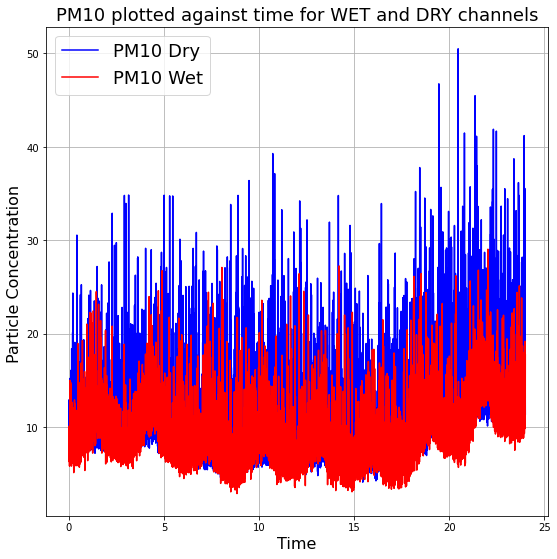

In [115]:
#dry channel
plt.plot(df['time_dry'], df['PM10_dry'],c='blue',label='PM10 Dry')
plt.plot(df2['time_wet'], df2['PM10_wet'],c='red',label='PM10 Wet')
#plt.scatter(x=df['time_dry'], y=df['PM10_dry'],c='blue',marker = 'X',s=90,label='PM10 Dry')
#plt.scatter(x=df2['time_wet'], y=df2['PM10_wet'],c='red',marker = '*',s=140,label='PM10 Wet')
#plt.scatter(x=df_9['RHwet_avg'], y=df_9['G25_avg'],c='green',marker = 's',s=70,label='PM25')
plt.rcParams["figure.figsize"] = (9,9)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Particle Concentration ',fontsize=16)
#plt.ylim(0.75, 2)
#plt.xlim(60,90,30)
plt.grid()
plt.title("PM10 plotted against time for WET and DRY channels",fontsize=18)
plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.show()

In [117]:
df3.rename(columns = {'time':'time_ACS'}, inplace = True)
df3

,time_ACS,RHdry,RHwet
0,0.000000,12.68,62.21
1,0.002778,12.68,62.07
2,0.004444,12.68,62.10
3,0.006389,12.70,62.07
4,0.008056,12.68,61.83
...,...,...,...
12696,23.991667,14.83,73.16
12697,23.993333,14.83,73.28
12698,23.995278,14.83,73.25
12699,23.996944,14.83,73.52


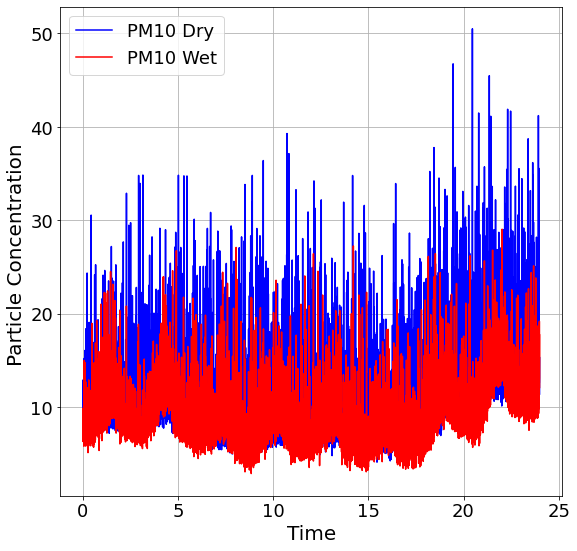

In [118]:
#dry channel
plt.plot(df['time_dry'], df['PM10_dry'],c='blue',label='PM10 Dry')
plt.plot(df2['time_wet'], df2['PM10_wet'],c='red',label='PM10 Wet')
#plt.scatter(x=df['time_dry'], y=df['PM10_dry'],c='blue',marker = 'X',s=90,label='PM10 Dry')
#plt.scatter(x=df2['time_wet'], y=df2['PM10_wet'],c='red',marker = '*',s=140,label='PM10 Wet')
#plt.scatter(x=df_9['RHwet_avg'], y=df_9['G25_avg'],c='green',marker = 's',s=70,label='PM25')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Particle Concentration ',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
#plt.ylim(0.75, 2)
#plt.xlim(60,90,30)
plt.grid()
#plt.title("PM10 plotted against time for WET and DRY channels",fontsize=18)
plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.show()

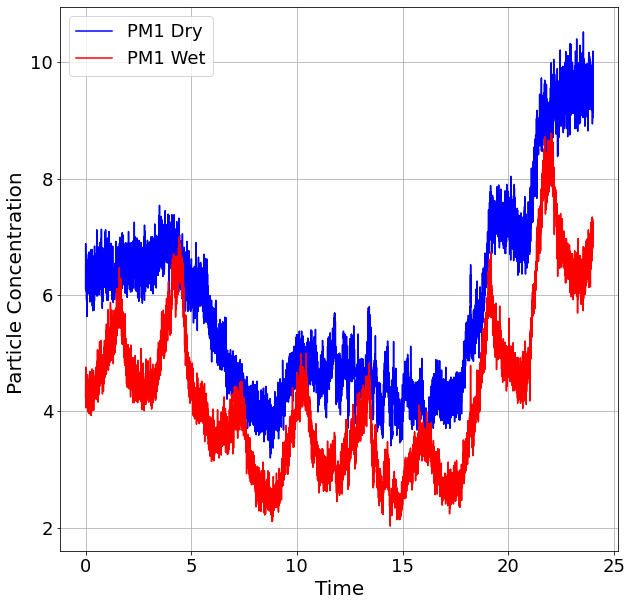

In [28]:
#dry channel
plt.plot(df['time_dry'], df['PM1_dry'],c='blue',label='PM1 Dry')
plt.plot(df2['time_wet'], df2['PM1_wet'],c='red',label='PM1 Wet')
#plt.scatter(x=df['time_dry'], y=df['PM10_dry'],c='blue',marker = 'X',s=90,label='PM10 Dry')
#plt.scatter(x=df2['time_wet'], y=df2['PM10_wet'],c='red',marker = '*',s=140,label='PM10 Wet')
#plt.scatter(x=df_9['RHwet_avg'], y=df_9['G25_avg'],c='green',marker = 's',s=70,label='PM25')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Particle Concentration ',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
#plt.ylim(0.75, 2)
#plt.xlim(60,90,30)
plt.grid()
#plt.title("PM1 plotted against time for WET and DRY channels",fontsize=18)
plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.show()

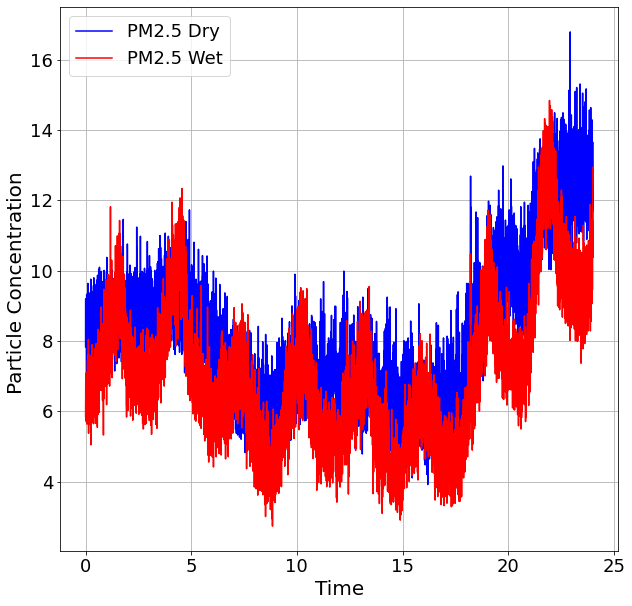

In [29]:
#dry channel
plt.plot(df['time_dry'], df['PM25_dry'],c='blue',label='PM2.5 Dry')
plt.plot(df2['time_wet'], df2['PM25_wet'],c='red',label='PM2.5 Wet')
#plt.scatter(x=df['time_dry'], y=df['PM10_dry'],c='blue',marker = 'X',s=90,label='PM10 Dry')
#plt.scatter(x=df2['time_wet'], y=df2['PM10_wet'],c='red',marker = '*',s=140,label='PM10 Wet')
#plt.scatter(x=df_9['RHwet_avg'], y=df_9['G25_avg'],c='green',marker = 's',s=70,label='PM25')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Particle Concentration ',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
#plt.ylim(0.75, 2)
#plt.xlim(60,90,30)
plt.grid()
#plt.title("PM2.5 plotted against time for WET and DRY channels",fontsize=18)
plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.show()

In [119]:
df, df2, df3

(       time_dry  PM1_dry  PM10_dry  PM25_dry
 0      0.000074     6.11      8.46      7.84
 1      0.002852     6.54     12.92      8.90
 2      0.005629     6.88      9.54      9.20
 3      0.008408     6.33      8.72      8.01
 4      0.011184     6.20     10.35      9.02
 ...         ...      ...       ...       ...
 8635  23.986193     9.44     14.49     13.05
 8636  23.988972    10.02     14.46     13.66
 8637  23.991750     9.14     15.37     12.84
 8638  23.994527    10.19     14.30     13.40
 8639  23.997305     9.05     11.41     11.09
 
 [8640 rows x 4 columns],
        time_wet  PM1_wet  PM10_wet  PM25_wet
 0      0.000469     4.24      6.35      5.86
 1      0.003250     4.61      7.13      6.78
 2      0.006025     4.52      7.82      6.87
 3      0.008802     4.76      9.88      6.92
 4      0.011580     4.26      6.98      6.53
 ...         ...      ...       ...       ...
 8635  23.986589     7.31     19.20     10.52
 8636  23.989366     6.82     12.04     10.37
 8637 

In [120]:
df6 = pd.concat([df, df2, df3], axis=1, join="outer")
df6

,time_dry,PM1_dry,PM10_dry,PM25_dry,time_wet,PM1_wet,PM10_wet,PM25_wet,time_ACS,RHdry,RHwet
0,0.000074,6.11,8.46,7.84,0.000469,4.24,6.35,5.86,0.000000,12.68,62.21
1,0.002852,6.54,12.92,8.90,0.003250,4.61,7.13,6.78,0.002778,12.68,62.07
2,0.005629,6.88,9.54,9.20,0.006025,4.52,7.82,6.87,0.004444,12.68,62.10
3,0.008408,6.33,8.72,8.01,0.008802,4.76,9.88,6.92,0.006389,12.70,62.07
4,0.011184,6.20,10.35,9.02,0.011580,4.26,6.98,6.53,0.008056,12.68,61.83
...,...,...,...,...,...,...,...,...,...,...,...
12696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.991667,14.83,73.16
12697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.993333,14.83,73.28
12698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.995278,14.83,73.25
12699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.996944,14.83,73.52


In [121]:
df6.fillna(0)

,time_dry,PM1_dry,PM10_dry,PM25_dry,time_wet,PM1_wet,PM10_wet,PM25_wet,time_ACS,RHdry,RHwet
0,0.000074,6.11,8.46,7.84,0.000469,4.24,6.35,5.86,0.000000,12.68,62.21
1,0.002852,6.54,12.92,8.90,0.003250,4.61,7.13,6.78,0.002778,12.68,62.07
2,0.005629,6.88,9.54,9.20,0.006025,4.52,7.82,6.87,0.004444,12.68,62.10
3,0.008408,6.33,8.72,8.01,0.008802,4.76,9.88,6.92,0.006389,12.70,62.07
4,0.011184,6.20,10.35,9.02,0.011580,4.26,6.98,6.53,0.008056,12.68,61.83
...,...,...,...,...,...,...,...,...,...,...,...
12696,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,23.991667,14.83,73.16
12697,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,23.993333,14.83,73.28
12698,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,23.995278,14.83,73.25
12699,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,23.996944,14.83,73.52


## Interpolation of Data

In [122]:
#pm1dry
x=df['time_dry'].values
y=df['PM1_dry'].values
#z=df6['time_ACS'].values
f = interpolate.interp1d(x, y, bounds_error=False, fill_value=0)
xnew=df6['time_ACS']
#PM1_dry_IP = f(df6['time_ACS'])
#xw=df6['time_ACS'].values
PM1_dry_IP = f(xnew)
df6['PM1_dry_IP']=PM1_dry_IP

In [123]:
#pm10dry
x1=df['time_dry'].values
y1=df['PM10_dry'].values
#z=df6['time_ACS'].values
f1 = interpolate.interp1d(x1, y1, bounds_error=False, fill_value=0)
xnew1=df6['time_ACS']
#PM1_dry_IP = f(df6['time_ACS'])
#xw=df6['time_ACS'].values
PM10_dry_IP = f1(xnew1)
df6['PM10_dry_IP']=PM10_dry_IP

In [124]:
#pm25dry
x2=df['time_dry'].values
y2=df['PM25_dry'].values
#z=df6['time_ACS'].values
f2 = interpolate.interp1d(x2, y2, bounds_error=False, fill_value=0)
xnew2=df6['time_ACS']
#PM1_dry_IP = f(df6['time_ACS'])
#xw=df6['time_ACS'].values
PM25_dry_IP = f2(xnew2)
df6['PM25_dry_IP']=PM25_dry_IP

In [125]:
#pm1wet
x3=df2['time_wet'].values
y3=df2['PM1_wet'].values
#z=df6['time_ACS'].values
f3 = interpolate.interp1d(x3, y3, bounds_error=False, fill_value=0)
xnew3=df6['time_ACS']
#PM1_dry_IP = f(df6['time_ACS'])
#xw=df6['time_ACS'].values
PM1_wet_IP = f3(xnew3)
df6['PM1_wet_IP']=PM1_wet_IP

In [126]:
#pm10wet
x4=df2['time_wet'].values
y4=df2['PM10_wet'].values
#z=df6['time_ACS'].values
f4 = interpolate.interp1d(x4, y4, bounds_error=False, fill_value=0)
xnew4=df6['time_ACS']
#PM1_dry_IP = f(df6['time_ACS'])
#xw=df6['time_ACS'].values
PM10_wet_IP = f4(xnew4)
df6['PM10_wet_IP']=PM10_wet_IP

In [127]:
#pm25wet
x5=df2['time_wet'].values
y5=df2['PM25_wet'].values
#z=df6['time_ACS'].values
f5 = interpolate.interp1d(x5, y5, bounds_error=False, fill_value=0)
xnew5=df6['time_ACS']
#PM1_dry_IP = f(df6['time_ACS'])
#xw=df6['time_ACS'].values
PM25_wet_IP = f5(xnew5)
df6['PM25_wet_IP']=PM25_wet_IP

In [128]:
df6

,time_dry,PM1_dry,PM10_dry,PM25_dry,time_wet,PM1_wet,PM10_wet,PM25_wet,time_ACS,RHdry,RHwet,PM1_dry_IP,PM10_dry_IP,PM25_dry_IP,PM1_wet_IP,PM10_wet_IP,PM25_wet_IP
0,0.000074,6.11,8.46,7.84,0.000469,4.24,6.35,5.86,0.000000,12.68,62.21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002852,6.54,12.92,8.90,0.003250,4.61,7.13,6.78,0.002778,12.68,62.07,6.528478,12.800496,8.871598,4.547206,6.997624,6.623864
2,0.005629,6.88,9.54,9.20,0.006025,4.52,7.82,6.87,0.004444,12.68,62.10,6.734946,10.982003,9.072012,4.571252,7.427066,6.818748
3,0.008408,6.33,8.72,8.01,0.008802,4.76,9.88,6.92,0.006389,12.70,62.07,6.729635,9.315820,8.874665,4.551464,8.090066,6.876555
4,0.011184,6.20,10.35,9.02,0.011580,4.26,6.98,6.53,0.008056,12.68,61.83,6.399767,8.824016,8.160951,4.695464,9.326066,6.906555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.991667,14.83,73.16,9.166483,15.342614,12.864677,7.176133,12.826806,11.073985
12697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.993333,14.83,73.28,9.738694,14.759902,13.159304,7.220041,13.054198,11.104444
12698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.995278,14.83,73.25,9.881775,13.518622,12.775438,7.160832,13.727831,11.204301
12699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.996944,14.83,73.52,9.197843,11.784796,11.389577,7.070769,16.489765,12.399137


In [129]:
df6.drop('time_dry', axis=1, inplace=True)
df6.drop('time_wet', axis=1, inplace=True)
df6.drop('PM1_dry', axis=1, inplace=True)
df6.drop('PM10_dry', axis=1, inplace=True)

In [130]:
df6.drop('PM25_dry', axis=1, inplace=True)
df6.drop('PM1_wet', axis=1, inplace=True)
df6.drop('PM10_wet', axis=1, inplace=True)
df6.drop('PM25_wet', axis=1, inplace=True)

In [131]:
df6

,time_ACS,RHdry,RHwet,PM1_dry_IP,PM10_dry_IP,PM25_dry_IP,PM1_wet_IP,PM10_wet_IP,PM25_wet_IP
0,0.000000,12.68,62.21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002778,12.68,62.07,6.528478,12.800496,8.871598,4.547206,6.997624,6.623864
2,0.004444,12.68,62.10,6.734946,10.982003,9.072012,4.571252,7.427066,6.818748
3,0.006389,12.70,62.07,6.729635,9.315820,8.874665,4.551464,8.090066,6.876555
4,0.008056,12.68,61.83,6.399767,8.824016,8.160951,4.695464,9.326066,6.906555
...,...,...,...,...,...,...,...,...,...
12696,23.991667,14.83,73.16,9.166483,15.342614,12.864677,7.176133,12.826806,11.073985
12697,23.993333,14.83,73.28,9.738694,14.759902,13.159304,7.220041,13.054198,11.104444
12698,23.995278,14.83,73.25,9.881775,13.518622,12.775438,7.160832,13.727831,11.204301
12699,23.996944,14.83,73.52,9.197843,11.784796,11.389577,7.070769,16.489765,12.399137


## Calculating Correct Values after Interpolation

In [132]:
df6['PM1_dry_c']=0.67 * df6['PM1_dry_IP'] - 0.18
df6['PM10_dry_c']=0.67 * df6['PM10_dry_IP'] - 0.18
df6['PM25_dry_c']=0.67 * df6['PM25_dry_IP'] - 0.18

In [133]:
df6['G1']=df6['PM1_wet_IP']/df6['PM1_dry_c']
df6['G10']=df6['PM10_wet_IP']/df6['PM10_dry_c']
df6['G25']=df6['PM25_wet_IP']/df6['PM25_dry_c']

In [134]:
df6

,time_ACS,RHdry,RHwet,PM1_dry_IP,PM10_dry_IP,PM25_dry_IP,PM1_wet_IP,PM10_wet_IP,PM25_wet_IP,PM1_dry_c,PM10_dry_c,PM25_dry_c,G1,G10,G25
0,0.000000,12.68,62.21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.180000,-0.180000,-0.180000,-0.000000,-0.000000,-0.000000
1,0.002778,12.68,62.07,6.528478,12.800496,8.871598,4.547206,6.997624,6.623864,4.194080,8.396332,5.763970,1.084196,0.833414,1.149184
2,0.004444,12.68,62.10,6.734946,10.982003,9.072012,4.571252,7.427066,6.818748,4.332414,7.177942,5.898248,1.055128,1.034707,1.156063
3,0.006389,12.70,62.07,6.729635,9.315820,8.874665,4.551464,8.090066,6.876555,4.328856,6.061599,5.766026,1.051424,1.334642,1.192599
4,0.008056,12.68,61.83,6.399767,8.824016,8.160951,4.695464,9.326066,6.906555,4.107844,5.732091,5.287837,1.143048,1.626992,1.306121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12696,23.991667,14.83,73.16,9.166483,15.342614,12.864677,7.176133,12.826806,11.073985,5.961543,10.099552,8.439334,1.203738,1.270037,1.312187
12697,23.993333,14.83,73.28,9.738694,14.759902,13.159304,7.220041,13.054198,11.104444,6.344925,9.709134,8.636733,1.137924,1.344527,1.285723
12698,23.995278,14.83,73.25,9.881775,13.518622,12.775438,7.160832,13.727831,11.204301,6.440789,8.877477,8.379544,1.111794,1.546366,1.337102
12699,23.996944,14.83,73.52,9.197843,11.784796,11.389577,7.070769,16.489765,12.399137,5.982555,7.715813,7.451017,1.181898,2.137139,1.664087


[]

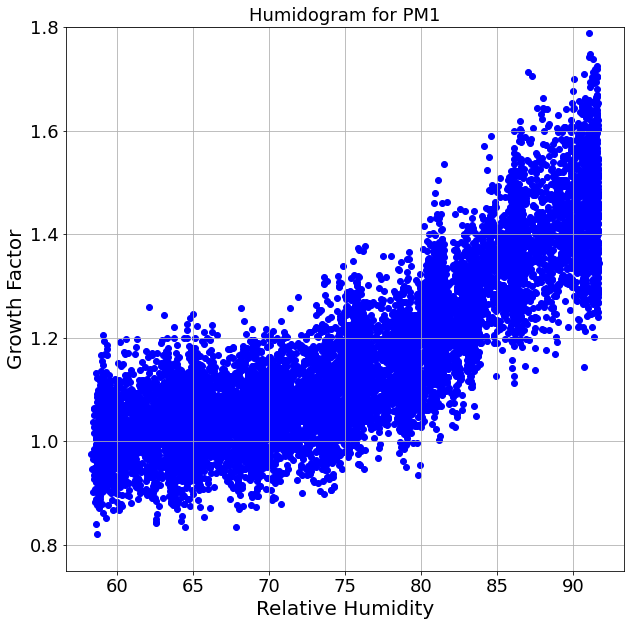

In [135]:
plt.scatter(x=df6['RHwet'],y=df6['G1'],c='blue')
plt.xlabel('Relative Humidity',fontsize=20)
plt.ylabel('Growth Factor',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.rcParams["figure.figsize"] = (10,10)
plt.ylim(0.75, 1.8)
#plt.grid()
plt.title("Humidogram for PM1",fontsize=18)
#plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.grid()
plt.plot()

[]

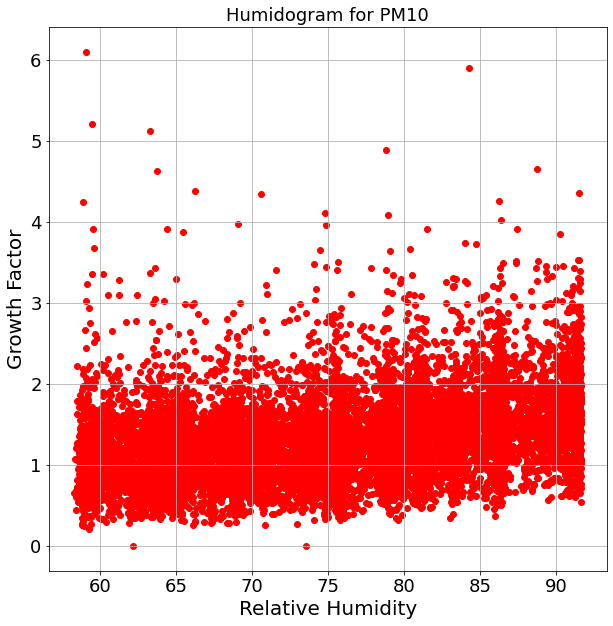

In [136]:
plt.scatter(x=df6['RHwet'],y=df6['G10'],c='red')
plt.xlabel('Relative Humidity',fontsize=20)
plt.ylabel('Growth Factor',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.rcParams["figure.figsize"] = (6,6)
#plt.ylim(0.75, 1.8)
#plt.grid()
plt.title("Humidogram for PM10",fontsize=18)
#plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.grid()
plt.plot()

[]

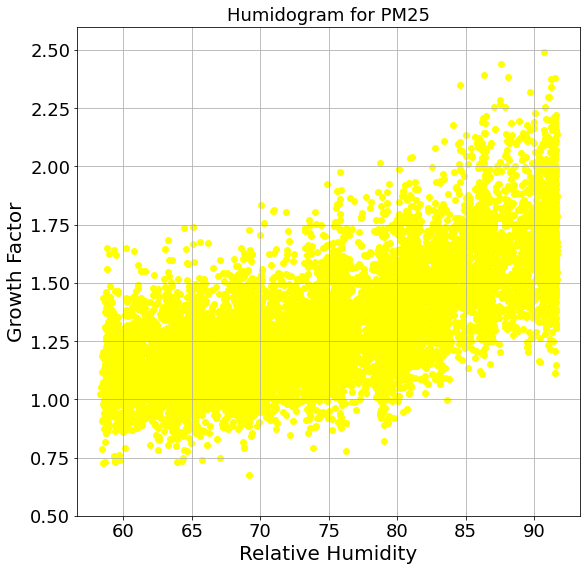

In [140]:
plt.scatter(x=df6['RHwet'],y=df6['G25'],c='yellow')
plt.xlabel('Relative Humidity',fontsize=20)
plt.ylabel('Growth Factor',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.rcParams["figure.figsize"] = (9,9)
plt.ylim(0.5, 2.6)
#plt.grid()
plt.title("Humidogram for PM25",fontsize=18)
#plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.grid()
plt.plot()

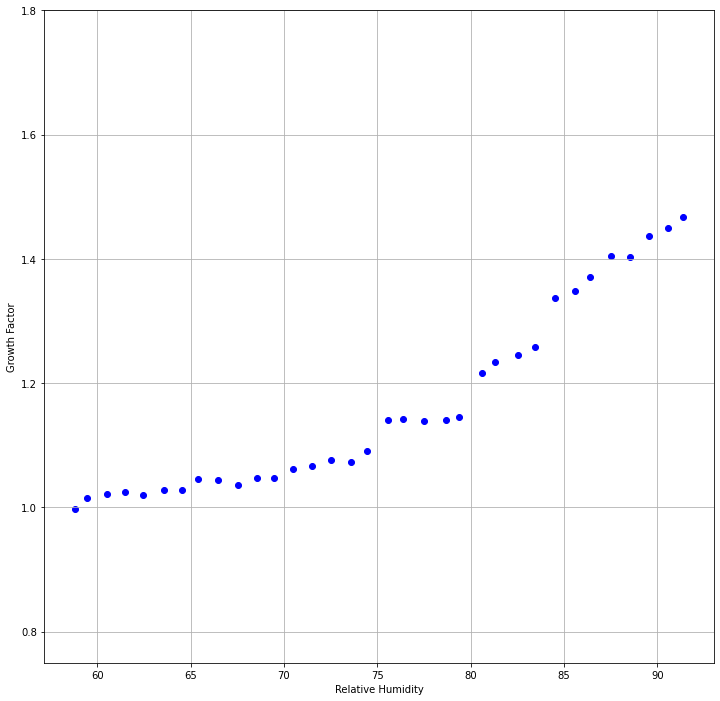

In [142]:
df6_copy = df6.copy()

intervals = range(55,95,1)
df_7 = pd.DataFrame(columns=["RHwet_avg", "G1_avg"])
for val in intervals :
  df_temp = df6_copy[(df6_copy['RHwet'] >= val) & (df6_copy['RHwet'] <= val+1)].copy()
  df_7 = df_7.append({"RHwet_avg" : df_temp['RHwet'].mean(), "G1_avg": df_temp['G1'].mean() },ignore_index=True)
  plt.scatter(x=df_temp['RHwet'].mean(),y=df_temp['G1'].mean(),c='blue')
  plt.xlabel('Relative Humidity')
  plt.ylabel('Growth Factor')
  plt.rcParams["figure.figsize"] = (12,12)
  plt.ylim(0.75, 1.8)
  plt.plot()
plt.grid()  
  #print(df_temp['RHwet'].head())

In [143]:
df_7

,RHwet_avg,G1_avg
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,58.793856,0.997993
4,59.439692,1.015312
5,60.506570,1.021197
6,61.477419,1.025689
7,62.480000,1.019841
8,63.581340,1.028034
9,64.535347,1.028861


In [144]:
df_7['y_err'] = df_7['G1_avg'].std()
df_7['x_err'] = df_7['RHwet_avg'].std()
df_7.drop([0,1,2,37,38,39], axis=0, inplace=True)

In [145]:
df_7

,RHwet_avg,G1_avg,y_err,x_err
3,58.793856,0.997993,0.151348,9.941013
4,59.439692,1.015312,0.151348,9.941013
5,60.506570,1.021197,0.151348,9.941013
6,61.477419,1.025689,0.151348,9.941013
7,62.480000,1.019841,0.151348,9.941013
8,63.581340,1.028034,0.151348,9.941013
9,64.535347,1.028861,0.151348,9.941013
10,65.406243,1.045066,0.151348,9.941013
11,66.491991,1.043957,0.151348,9.941013
12,67.514223,1.036429,0.151348,9.941013


a = 0.059765375542589295 , b = 0.9334269741826507


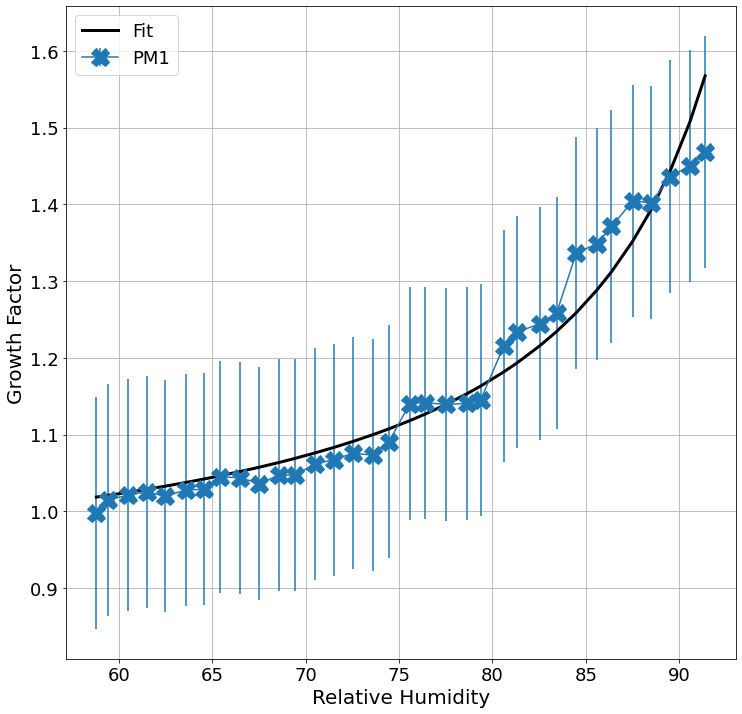

Slope (a) is  0.059765375542589295
Intercept (b) is  0.9334269741826507
[0.00244363 0.01117383]


In [146]:
x=df_7['RHwet_avg'].values
y=df_7['G1_avg'].values

def func(x, a, b):
    return ((a*(x/(100-x))) + b)

popt, pcov = curve_fit(func, x, y)

print("a = %s , b = %s" % (popt[0], popt[1]))

#plt.scatter(x,y,c='red',label='Experimental Data')
plt.errorbar(x=df_7['RHwet_avg'], y=df_7['G1_avg'],marker='X', markersize=18, yerr = 0.151348, label='PM1')
#plt.scatter(x,y,c='blue',marker = 'X',s=80,label='PM1 Data')
plt.xlabel('Relative Humidity',fontsize=20)
plt.ylabel('Growth Factor',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.plot(x, func(x,popt[0], popt[1]),c='black',lw=3,label='Fit')
plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.grid()
plt.show()

params, covariance = curve_fit(func,x,y)
print('Slope (a) is ', params[0])
print('Intercept (b) is ', params[1])
paramErrors=np.sqrt(np.diag(covariance))
#print(covariance)
print(paramErrors)

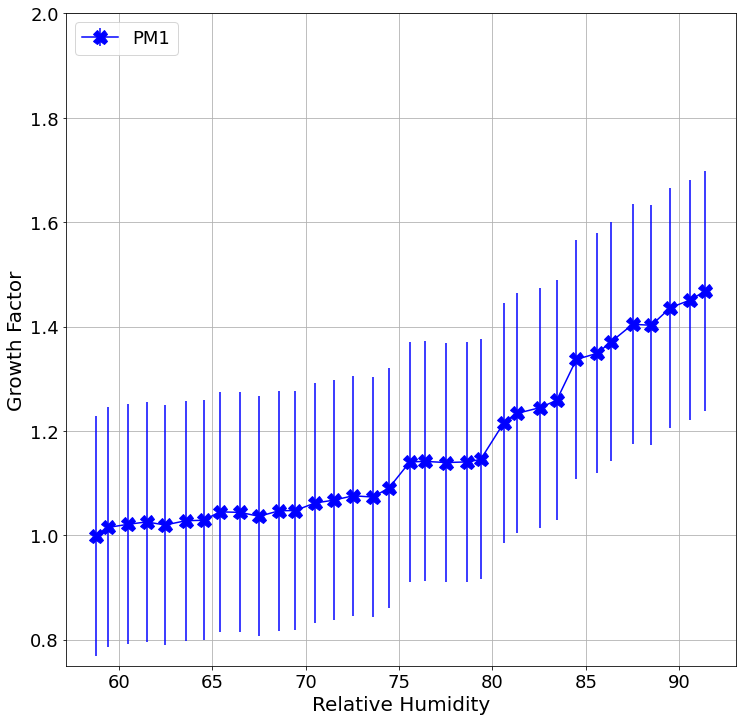

In [147]:
plt.errorbar(x=df_7['RHwet_avg'], y=df_7['G1_avg'],c='blue', marker='X',markersize=14, yerr = 0.229805, label='PM1')
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel('Relative Humidity',fontsize=20)
plt.ylabel('Growth Factor',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.ylim(0.75, 2)
plt.grid()
plt.legend(loc='upper left',prop={'size': 18})
plt.show()

In [148]:
df_7['y_err'] = df_7['G1_avg'].std()
df_7['x_err'] = df_7['RHwet_avg'].std()

In [149]:
df_7

,RHwet_avg,G1_avg,y_err,x_err
3,58.793856,0.997993,0.151348,9.941013
4,59.439692,1.015312,0.151348,9.941013
5,60.506570,1.021197,0.151348,9.941013
6,61.477419,1.025689,0.151348,9.941013
7,62.480000,1.019841,0.151348,9.941013
8,63.581340,1.028034,0.151348,9.941013
9,64.535347,1.028861,0.151348,9.941013
10,65.406243,1.045066,0.151348,9.941013
11,66.491991,1.043957,0.151348,9.941013
12,67.514223,1.036429,0.151348,9.941013


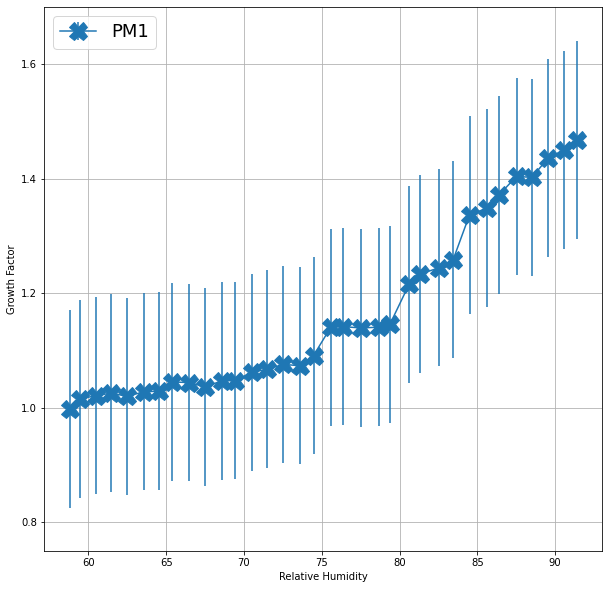

In [151]:
plt.errorbar(x=df_7['RHwet_avg'], y=df_7['G1_avg'],marker='X', markersize=18, yerr = 0.17258, label='PM1')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Relative Humidity')
plt.ylabel('Growth Factor')
plt.ylim(0.75, 1.7)
plt.grid()
plt.legend(loc='upper left',prop={'size': 18})
plt.show()

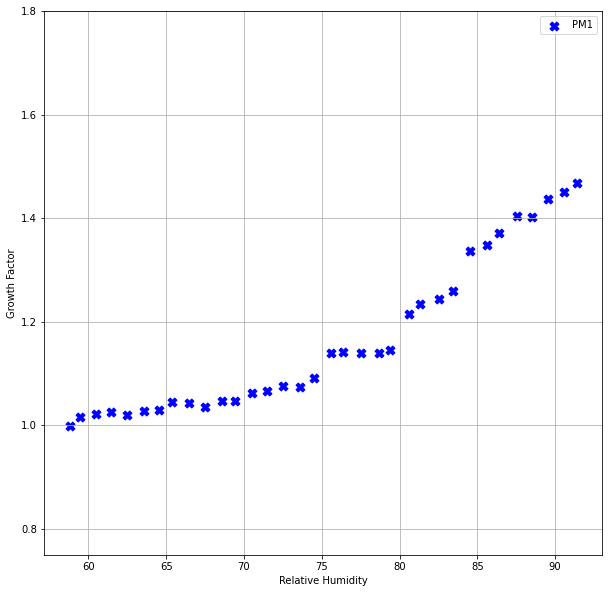

In [152]:
plt.scatter(x=df_7['RHwet_avg'], y=df_7['G1_avg'],c='blue',marker = 'X',s=80,label='PM1')
plt.xlabel('Relative Humidity')
plt.ylabel('Growth Factor')
plt.rcParams["figure.figsize"] = (10,10)
plt.ylim(0.75, 1.8)
plt.plot()
plt.legend()
plt.grid()  

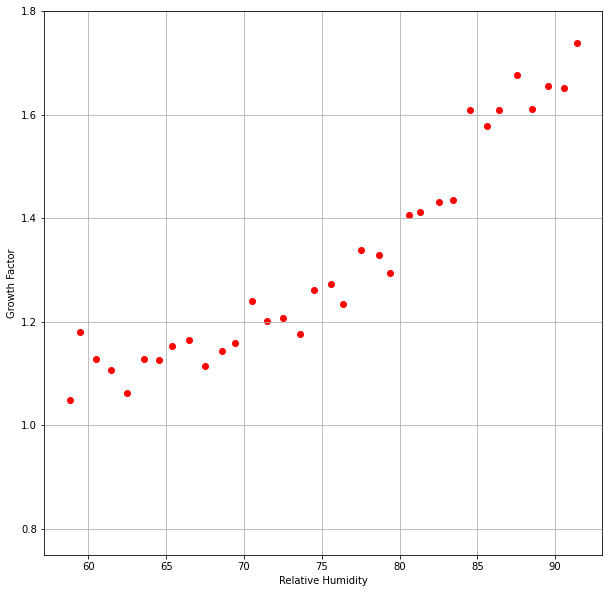

In [153]:
df6_copy = df6.copy()

intervals = range(55,95,1)
df_8 = pd.DataFrame(columns=["RHwet_avg", "G10_avg"])
for val in intervals :
  df_temp = df6_copy[(df6_copy['RHwet'] >= val) & (df6_copy['RHwet'] <= val+1)].copy()
  df_8 = df_8.append({"RHwet_avg" : df_temp['RHwet'].mean(), "G10_avg": df_temp['G10'].mean() },ignore_index=True)
  plt.scatter(x=df_temp['RHwet'].mean(),y=df_temp['G10'].mean(),c='red')
  plt.xlabel('Relative Humidity')
  plt.ylabel('Growth Factor')
  plt.rcParams["figure.figsize"] = (12,12)
  plt.ylim(0.75, 1.8)
  plt.plot()
plt.grid() 

In [155]:
df_8

,RHwet_avg,G10_avg
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,58.793856,1.049235
4,59.439692,1.180307
5,60.506570,1.127675
6,61.477419,1.106409
7,62.480000,1.062879
8,63.581340,1.128479
9,64.535347,1.125638


In [156]:
df_8.drop([0,1,2,37,38,39], axis=0, inplace=True)

In [157]:
df_8['y_err'] = df_8['G10_avg'].std()
df_8['x_err'] = df_8['RHwet_avg'].std()

In [158]:
df_8

,RHwet_avg,G10_avg,y_err,x_err
3,58.793856,1.049235,0.20751,9.941013
4,59.439692,1.180307,0.20751,9.941013
5,60.506570,1.127675,0.20751,9.941013
6,61.477419,1.106409,0.20751,9.941013
7,62.480000,1.062879,0.20751,9.941013
8,63.581340,1.128479,0.20751,9.941013
9,64.535347,1.125638,0.20751,9.941013
10,65.406243,1.153871,0.20751,9.941013
11,66.491991,1.164022,0.20751,9.941013
12,67.514223,1.114796,0.20751,9.941013


a = 0.08012324116566054 , b = 1.010092010582826


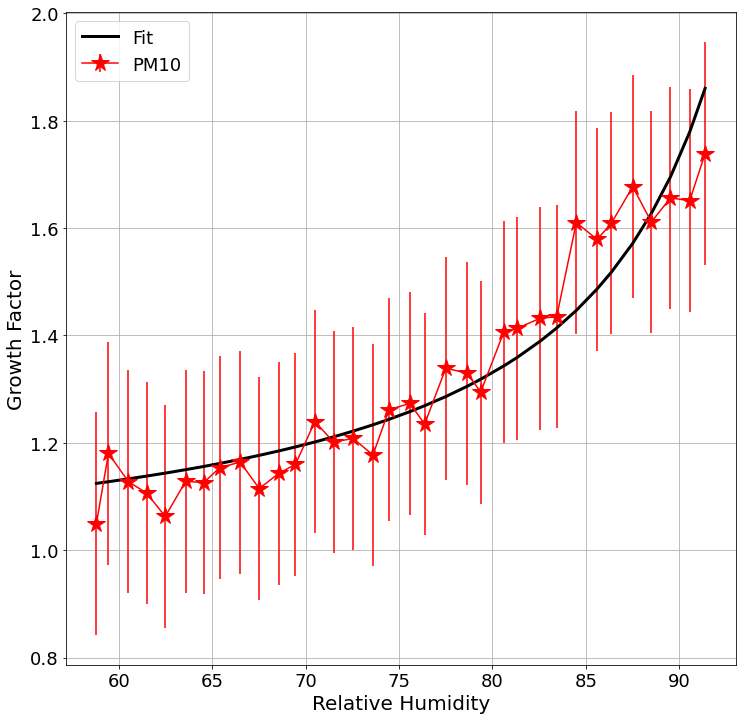

Slope (a) is  0.08012324116566054
Intercept (b) is  1.010092010582826
[0.00452127 0.02067416]


In [159]:
x1=df_8['RHwet_avg'].values
y1=df_8['G10_avg'].values

def func(x, a, b):
    return (a*(x1/(100-x1))) + b

popt, pcov = curve_fit(func, x1, y1)

print("a = %s , b = %s" % (popt[0], popt[1]))

#plt.scatter(x,y,c='red',label='Experimental Data')
plt.errorbar(x=df_8['RHwet_avg'], y=df_8['G10_avg'],c='red',marker='*', markersize=18, yerr = 0.20751, label='PM10')
#plt.scatter(x,y,c='blue',marker = 'X',s=80,label='PM1 Data')
plt.xlabel('Relative Humidity',fontsize=20)
plt.ylabel('Growth Factor',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.plot(x1, func(x1,popt[0], popt[1]),c='black',lw=3,label='Fit')
plt.legend(loc='upper left',prop={'size': 18})
plt.grid()
plt.show()

params, covariance = curve_fit(func,x1,y1)
print('Slope (a) is ', params[0])
print('Intercept (b) is ', params[1])
paramErrors=np.sqrt(np.diag(covariance))
#print(covariance)
print(paramErrors)


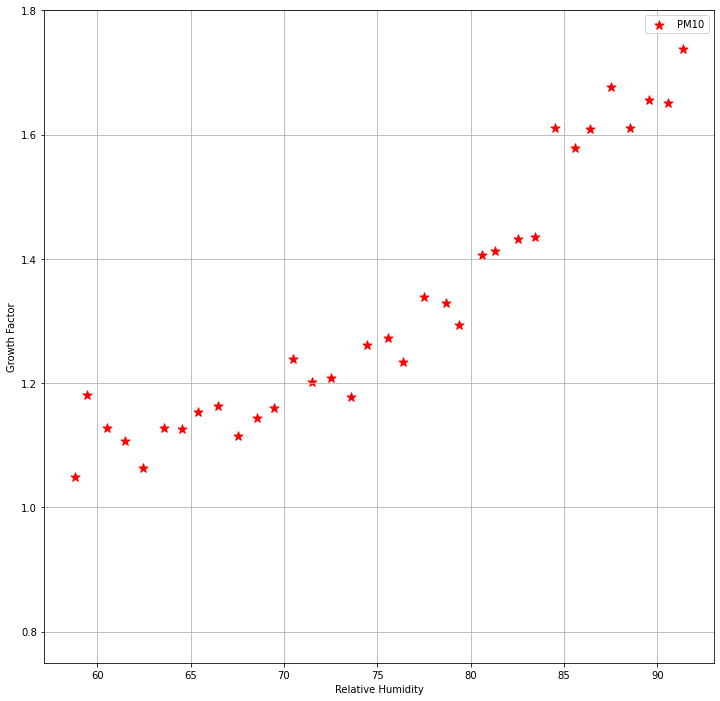

In [160]:
plt.scatter(x=df_8['RHwet_avg'], y=df_8['G10_avg'],c='red',marker = '*',s=90,label='PM10')
plt.xlabel('Relative Humidity')
plt.ylabel('Growth Factor')
plt.rcParams["figure.figsize"] = (10,10)
plt.ylim(0.75, 1.8)
plt.plot()
plt.legend()
plt.grid()  

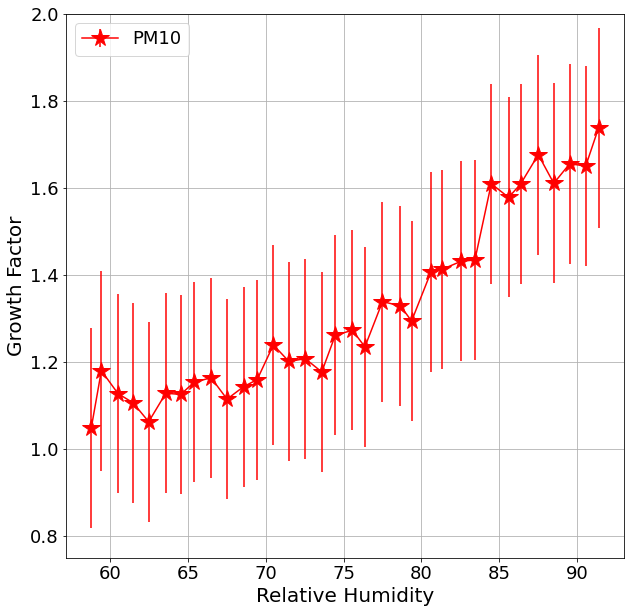

In [161]:
plt.errorbar(x=df_8['RHwet_avg'], y=df_8['G10_avg'],c='red', marker='*',markersize=18, yerr = 0.229805, label='PM10')
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel('Relative Humidity',fontsize=20)
plt.ylabel('Growth Factor',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.ylim(0.75, 2)
plt.grid()
plt.legend(loc='upper left',prop={'size': 18})
plt.show()

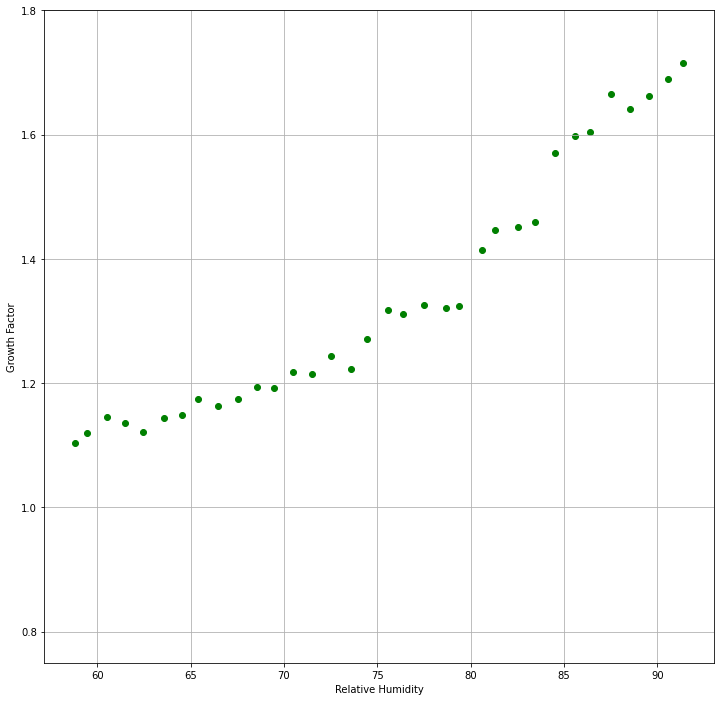

In [163]:
df6_copy = df6.copy()

intervals = range(55,95,1)
df_9 = pd.DataFrame(columns=["RHwet_avg", "G25_avg"])
for val in intervals :
  df_temp = df6_copy[(df6_copy['RHwet'] >= val) & (df6_copy['RHwet'] <= val+1)].copy()
  df_9 = df_9.append({"RHwet_avg" : df_temp['RHwet'].mean(), "G25_avg": df_temp['G25'].mean() },ignore_index=True)
  plt.scatter(x=df_temp['RHwet'].mean(),y=df_temp['G25'].mean(),c='green')
  plt.xlabel('Relative Humidity')
  plt.ylabel('Growth Factor')
  plt.rcParams["figure.figsize"] = (12,12)
  plt.ylim(0.75, 1.8)
  plt.plot()
plt.grid() 

In [164]:
df_9

,RHwet_avg,G25_avg
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,58.793856,1.104273
4,59.439692,1.120172
5,60.506570,1.146042
6,61.477419,1.136286
7,62.480000,1.120760
8,63.581340,1.143706
9,64.535347,1.148536


In [165]:
df_9.drop([0,1,2,37,38,39], axis=0, inplace=True)

In [166]:
df_9['y_err'] = df_9['G25_avg'].std()
df_9['x_err'] = df_9['RHwet_avg'].std()

In [167]:
df_9

,RHwet_avg,G25_avg,y_err,x_err
3,58.793856,1.104273,0.198,9.941013
4,59.439692,1.120172,0.198,9.941013
5,60.506570,1.146042,0.198,9.941013
6,61.477419,1.136286,0.198,9.941013
7,62.480000,1.120760,0.198,9.941013
8,63.581340,1.143706,0.198,9.941013
9,64.535347,1.148536,0.198,9.941013
10,65.406243,1.175268,0.198,9.941013
11,66.491991,1.163476,0.198,9.941013
12,67.514223,1.174710,0.198,9.941013


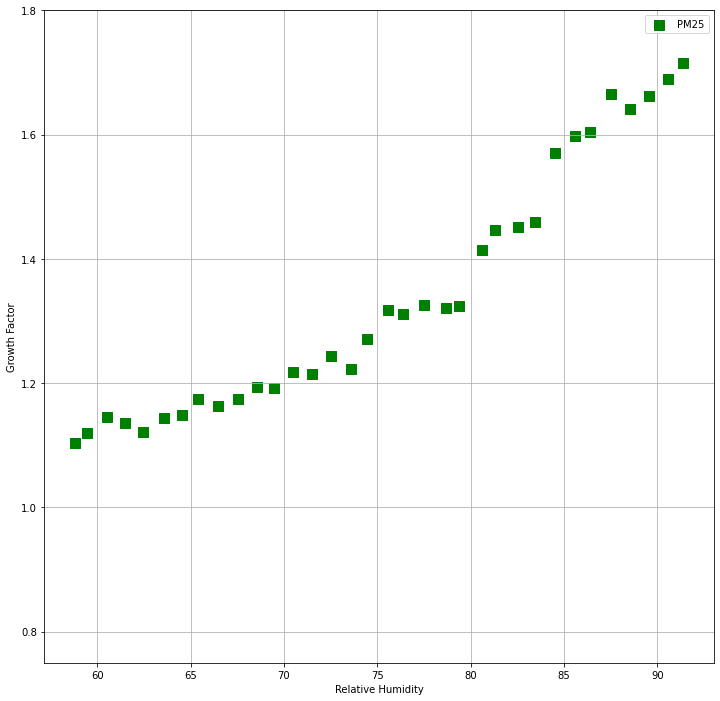

In [168]:
plt.scatter(x=df_9['RHwet_avg'], y=df_9['G25_avg'],c='green',marker = 's',s=90,label='PM25')
plt.xlabel('Relative Humidity')
plt.ylabel('Growth Factor')
plt.rcParams["figure.figsize"] = (10,10)
plt.ylim(0.75, 1.8)
plt.plot()
plt.legend()
plt.grid()  

a = 0.07738343894372761 , b = 1.0389195022996531


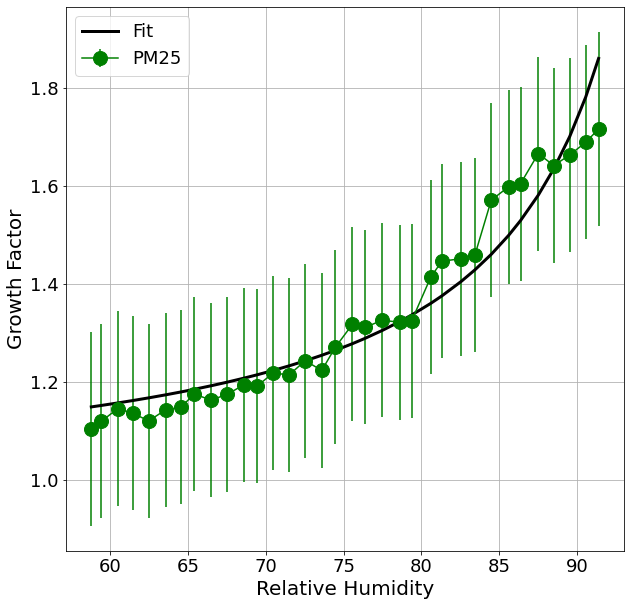

Slope (a) is  0.07738343894372761
Intercept (b) is  1.0389195022996531
[0.00375904 0.01718876]


In [169]:
x2=df_9['RHwet_avg'].values
y2=df_9['G25_avg'].values

def func(x2, a, b):
    return (a*(x2/(100-x2))) + b

popt, pcov = curve_fit(func, x2, y2)

print("a = %s , b = %s" % (popt[0], popt[1]))

#plt.scatter(x,y,c='red',label='Experimental Data')
plt.errorbar(x=df_9['RHwet_avg'], y=df_9['G25_avg'],c='green',marker='o', markersize=14, yerr = 0.198, label='PM25')
#plt.scatter(x,y,c='blue',marker = 'X',s=80,label='PM1 Data')
plt.xlabel('Relative Humidity',fontsize=20)
plt.ylabel('Growth Factor',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.plot(x2, func(x2,popt[0], popt[1]),c='black',lw=3,label='Fit')
plt.rcParams["figure.figsize"] = (10,10)
plt.legend(loc='upper left',prop={'size': 18})
plt.grid()
plt.show()

params, covariance = curve_fit(func,x2,y2)
print('Slope (a) is ', params[0])
print('Intercept (b) is ', params[1])
paramErrors=np.sqrt(np.diag(covariance))
#print(covariance)
print(paramErrors)

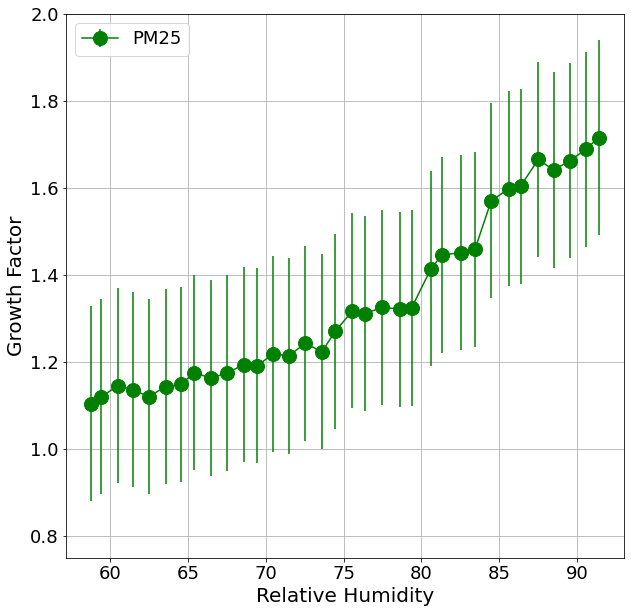

In [170]:
plt.errorbar(x=df_9['RHwet_avg'], y=df_9['G25_avg'],c='green', marker='o',markersize=14, yerr = 0.224473, label='PM25')
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel('Relative Humidity',fontsize=20)
plt.ylabel('Growth Factor',fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.ylim(0.75, 2)
plt.grid()
plt.legend(loc='upper left',prop={'size': 18})
plt.show()

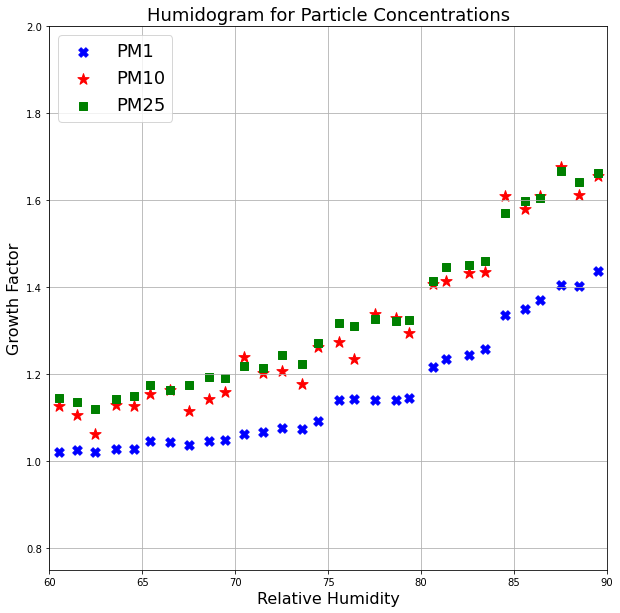

In [172]:
plt.scatter(x=df_7['RHwet_avg'], y=df_7['G1_avg'],c='blue',marker = 'X',s=90,label='PM1')
plt.scatter(x=df_8['RHwet_avg'], y=df_8['G10_avg'],c='red',marker = '*',s=140,label='PM10')
plt.scatter(x=df_9['RHwet_avg'], y=df_9['G25_avg'],c='green',marker = 's',s=70,label='PM25')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Relative Humidity',fontsize=16)
plt.ylabel('Growth Factor',fontsize=16)
plt.ylim(0.75, 2)
plt.xlim(60,90,30)
plt.grid()
plt.title("Humidogram for Particle Concentrations",fontsize=18)
plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.show()

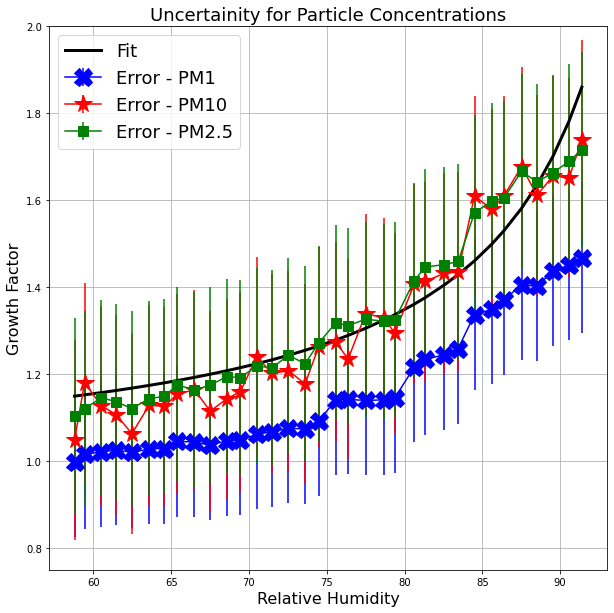

In [173]:
plt.errorbar(x=df_7['RHwet_avg'], y=df_7['G1_avg'], c='blue',marker='X', markersize=18, yerr = 0.17258, label='Error - PM1')
plt.errorbar(x=df_8['RHwet_avg'], y=df_8['G10_avg'],c='red', marker='*',markersize=18, yerr = 0.229805, label='Error - PM10')
plt.errorbar(x=df_9['RHwet_avg'], y=df_9['G25_avg'],c='green', marker='s',markersize=10, yerr = 0.224473, label='Error - PM2.5')
plt.plot(x, func(x,popt[0], popt[1]),c='black',lw=3,label='Fit')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Relative Humidity',fontsize=16)
plt.ylabel('Growth Factor',fontsize=16)
plt.ylim(0.75, 2)
plt.grid()
plt.title("Uncertainity for Particle Concentrations",fontsize=18)
plt.legend(loc='upper left',prop={'size': 18})
#plt.legend()
plt.show()